# 2주차 스터디

Made by 35기 코딩부장 류제현

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 정규방정식

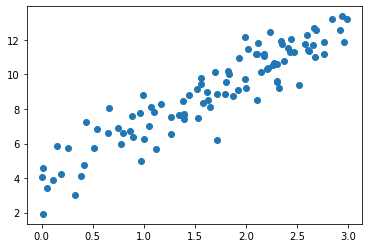

In [62]:
# 2X+3의 데이터를 생성
X = 3*  np.random.rand(100,1)
y = (4 + 3*X) + np.random.randn(100,1) # 랜덤한 잡음을 추가

plt.scatter(X,y)

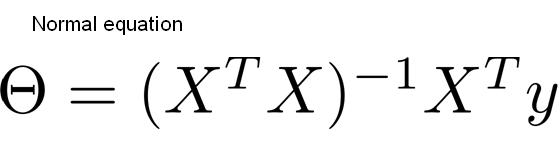

In [63]:
# 절편모델링을 위해 행렬 앞에 1을 붙여줘야함
X_b = np.c_[np.ones((100,1)), X]

# 정규방정식을 계산한다
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [64]:
theta_best

array([[4.07896513],
       [2.94087099]])

In [72]:
# 계산한 Theta을 새로운 데이터에 맞춰보자
X_new = np.array([[0],[3]])
X_new_b = np.c_[np.ones((2,1)), X_new]

# 0과 3에 대한 예측값
y_new = X_new_b.dot(theta_best)

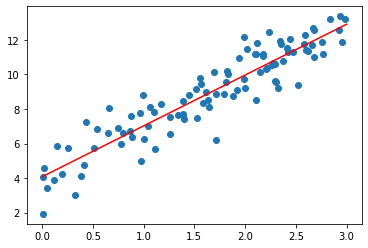

In [74]:
# 기존의 점도표
plt.scatter(X,y)

# 넘파이로 구한 회귀식 (빨간선)
plt.plot(X_new, y_new, color='r');

# 싸이킷런의 LinearRegression

* model을 만들고, fit해주면 된다

In [91]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X, y)

linear_model.coef_, linear_model.intercept_

(array([[2.94087099]]), array([4.07896513]))

In [79]:
sample = np.array([[1.5]])

linear_model.predict(sample)

array([[8.49027161]])

In [83]:
# Score의 경우 R^2값을 리턴한다
linear_model.score(X,y)

0.8583371035640428

# Statsmodels의 LinearRegression

In [92]:
import statsmodels.api as sm

model = sm.OLS(y,X_b)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     593.8
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           2.23e-43
Time:                        16:55:58   Log-Likelihood:                -140.01
No. Observations:                 100   AIC:                             284.0
Df Residuals:                      98   BIC:                             289.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0790      0.222     18.368      0.000       3.638       4.520
x1             2.9409      0.121     24.368      0.000       2.701       3.180
==============================================================================
Omnibus:                        1.892   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.475
Skew:                          -0.290   Prob(JB):                        0.478
Kurtosis:                       3.129   Cond. No.                         5.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Pandas Real World Example

In [1]:
import pandas as pd

In [71]:
df = pd.read_csv("KRX공모전_example.csv", encoding='cp949', index_col=0)
df.head(20) # iloc[:50]

,공시일,회사명,코드,보고서명,정정신고
0,2022-11-28,시티랩스,20221128000477,유상증자결정(제3자배정),YES
1,2022-11-28,인포마크,20221128000372,유상증자결정(일반공모 - 소액공모),YES
2,2022-11-28,초록뱀컴퍼니,20221128000316,유상증자결정(제3자배정-전환우선주),YES
3,2022-11-25,에프앤리퍼블릭,20221125000368,유상증자결정(제3자배정),YES
4,2022-11-25,상지카일룸,20221125000357,유상증자결정(제3자배정),YES
5,2022-11-25,HLB,20221125000272,유상증자결정(주주배정후 실권주 일반공모),YES
6,2022-11-25,형지I&C,20221125000262,유상증자결정(주주배정),YES
7,2022-11-23,글로본,20221123000329,유상증자결정(제3자배정-소액),YES
8,2022-11-22,율호,20221122000431,유상증자결정(제3자배정-소액),YES
9,2022-11-21,글로본,20221121000395,유상증자결정(제3자배정-소액),YES


In [72]:
# 우선 NaN값을 드롭한다
df = df.dropna(axis=0)
df.head(20)

,공시일,회사명,코드,보고서명,정정신고
0,2022-11-28,시티랩스,20221128000477,유상증자결정(제3자배정),YES
1,2022-11-28,인포마크,20221128000372,유상증자결정(일반공모 - 소액공모),YES
2,2022-11-28,초록뱀컴퍼니,20221128000316,유상증자결정(제3자배정-전환우선주),YES
3,2022-11-25,에프앤리퍼블릭,20221125000368,유상증자결정(제3자배정),YES
4,2022-11-25,상지카일룸,20221125000357,유상증자결정(제3자배정),YES
5,2022-11-25,HLB,20221125000272,유상증자결정(주주배정후 실권주 일반공모),YES
6,2022-11-25,형지I&C,20221125000262,유상증자결정(주주배정),YES
7,2022-11-23,글로본,20221123000329,유상증자결정(제3자배정-소액),YES
8,2022-11-22,율호,20221122000431,유상증자결정(제3자배정-소액),YES
9,2022-11-21,글로본,20221121000395,유상증자결정(제3자배정-소액),YES


In [73]:
# 회사명이 NaN아 아닌 없음을 제거해보자
df = df.loc[~(df['회사명'] == "없음")]
df.head(20)

,공시일,회사명,코드,보고서명,정정신고
0,2022-11-28,시티랩스,20221128000477,유상증자결정(제3자배정),YES
1,2022-11-28,인포마크,20221128000372,유상증자결정(일반공모 - 소액공모),YES
2,2022-11-28,초록뱀컴퍼니,20221128000316,유상증자결정(제3자배정-전환우선주),YES
3,2022-11-25,에프앤리퍼블릭,20221125000368,유상증자결정(제3자배정),YES
4,2022-11-25,상지카일룸,20221125000357,유상증자결정(제3자배정),YES
5,2022-11-25,HLB,20221125000272,유상증자결정(주주배정후 실권주 일반공모),YES
6,2022-11-25,형지I&C,20221125000262,유상증자결정(주주배정),YES
7,2022-11-23,글로본,20221123000329,유상증자결정(제3자배정-소액),YES
8,2022-11-22,율호,20221122000431,유상증자결정(제3자배정-소액),YES
9,2022-11-21,글로본,20221121000395,유상증자결정(제3자배정-소액),YES


In [74]:
df['보고서명'].unique()

array(['유상증자결정(제3자배정)', '유상증자결정(일반공모 - 소액공모)', '유상증자결정(제3자배정-전환우선주)',
       '유상증자결정(주주배정후 실권주 일반공모)', '유상증자결정(주주배정)', '유상증자결정(제3자배정-소액)',
       '유상증자결정', '유상증자결정(종속회사의 주요경영사항)', '유상증자결정(제3자배정증자)',
       '투자판단 관련 주요경영사항(주요 연결종속회사의 유상증자 결정에 따른 지분율 및 지배력 변동 예정 안내)',
       '유상증자결정(제3자배정-출자전환)', '유상증자결정(주주우선공모)', '유상증자결정(제3자배정_전환우선주)',
       '유상증자결정(제3자배정 현물출자)', '유상증자결정(주주우선공모증자)',
       '기타 주요경영사항(종속회사의 주요경영사항)(일반공모 유상증자 결정 철회)', '유상증자결정(일반공모)',
       '유상증자결정(제3자배정 - 상환전환우선주)', '유상증자결정(제3자배정 - 철회)',
       '유상증자결정(제3자배정-현물출자)', '유상증자결정(제3자배정 유상증자)', '유상증자결정(제3자배정증자-소액)',
       '유상증자결정(제3자배정-소액 철회)', '기타 주요경영사항(제3자 배정 유상증자 결정 철회)',
       '유상증자결정(종속회사의 주요경영사항)(일반공모-철회)', '유상증자결정(자율공시)(종속회사의 주요경영사항)',
       '유상증자결정(제3자배정-소액공모)', '유상증자결정(제3자배정-상환전환우선주)',
       '기타 주요경영사항(제3자배정 유상증자 결정 철회)'], dtype=object)

In [75]:
# 종속회사란 단어가 들어가는 데이터는 모두 제거한다

df = df.loc[~df['보고서명'].str.contains("종속회사")]

In [66]:
# 공시일을 datetime으로 만들어 index로 변환한다
df.index = pd.to_datetime(df['공시일'])

In [67]:
df = df.drop("공시일", axis=1)
df

,회사명,코드,보고서명,정정신고
공시일,,,,
2022-11-28,시티랩스,20221128000477,유상증자결정(제3자배정),YES
2022-11-28,인포마크,20221128000372,유상증자결정(일반공모 - 소액공모),YES
2022-11-28,초록뱀컴퍼니,20221128000316,유상증자결정(제3자배정-전환우선주),YES
2022-11-25,에프앤리퍼블릭,20221125000368,유상증자결정(제3자배정),YES
2022-11-25,상지카일룸,20221125000357,유상증자결정(제3자배정),YES
...,...,...,...,...
2022-10-05,좋은사람들,20221005000474,유상증자결정(제3자배정),YES
2022-10-04,에이치앤비디자인,20221004000625,유상증자결정(제3자배정증자),YES
2022-10-04,카나리아바이오,20221004000564,유상증자결정,NO


In [69]:
df.loc["2022-10"]

,회사명,코드,보고서명,정정신고
공시일,,,,
2022-10-31,글로본,20221031000764,유상증자결정(제3자배정-소액),YES
2022-10-31,글로본,20221031000754,유상증자결정(제3자배정),YES
2022-10-31,참존글로벌,20221031000621,유상증자결정(제3자배정-현물출자),YES
2022-10-31,THE E&M,20221031000552,유상증자결정(제3자배정증자),YES
2022-10-31,JTC,20221031000389,유상증자결정(제3자배정),YES
...,...,...,...,...
2022-10-05,좋은사람들,20221005000474,유상증자결정(제3자배정),YES
2022-10-04,에이치앤비디자인,20221004000625,유상증자결정(제3자배정증자),YES
2022-10-04,카나리아바이오,20221004000564,유상증자결정,NO


In [70]:
df.loc["2022-10-10":"2022-10-20"]

C:\Users\user\AppData\Local\Temp\ipykernel_1404\2900880182.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df.loc["2022-10-10":"2022-10-20"]


,회사명,코드,보고서명,정정신고
공시일,,,,
2022-10-20,이오플로우,20221020000523,유상증자결정(종속회사의 주요경영사항),NO
2022-10-20,오가닉티코스메틱,20221020000091,유상증자결정(제3자배정증자),YES
2022-10-19,에이티세미콘,20221019000564,유상증자결정(제3자배정),YES
2022-10-19,EV수성,20221019000532,유상증자결정(제3자배정),YES
2022-10-19,폴라리스오피스,20221019000526,유상증자결정(제3자배정),NO
2022-10-18,알엔투테크놀로지,20221018000520,유상증자결정(제3자배정),YES
2022-10-18,KG ETS,20221018000512,유상증자결정(종속회사의 주요경영사항),NO
2022-10-18,어반리튬,20221018000453,유상증자결정(제3자배정증자-소액),YES
2022-10-18,JTC,20221018000452,유상증자결정(제3자배정),YES
